In [1]:
import tensorflow as tf
import numpy as np

print('TensorFlow version:', tf.__version__)
print('NumPy version: ', np.__version__)

2023-07-29 12:01:46.868009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.10.0
NumPy version:  1.25.1


In [2]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate(
            [zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int((len(x_padded) - len(w_rot)) / s) + 1, s):
        res.append(np.sum(
            x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)


## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:',
      conv1d(x, w, p=2, s=1))

print('Numpy Results:',
      np.convolve(x, w, mode='same'))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


In [3]:
(np.log(0.51)) + np.log(2.94)

0.40506502808682465

In [4]:
# import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
## MNIST dataset

# mnist_bldr = tfds.builder('mnist')
# mnist_bldr.download_and_prepare()
# datasets = mnist_bldr.as_dataset(shuffle_files=False)
# print(datasets.keys())
# mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

In [6]:
import os
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 28, 28, 1)
        # images = ((images / 255.) - .5) * 2

    return images, labels

In [7]:
path = '../datasets/mnist'

X_train, y_train = load_mnist(path, kind='train')
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [8]:
X_test, y_test = load_mnist(path, kind='t10k')
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [9]:
X_test[0, :, : , 0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = tf.data.Dataset.from_tensor_slices((
    tf.cast(X_train, tf.float32) / 255.0,
    tf.cast(y_train, tf.int32)
))

mnist_test = tf.data.Dataset.from_tensor_slices((
    tf.cast(X_test, tf.float32) / 255.0,
    tf.cast(y_test, tf.int32)
))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

### Implementing a CNN using the TensorFlow Keras API

#### Configuring CNN layers in Keras

 * **Conv2D:** `tf.keras.layers.Conv2D`
   * `filters`
   * `kernel_size`
   * `strides`
   * `padding`
   
   
 * **MaxPool2D:** `tf.keras.layers.MaxPool2D`
   * `pool_size`
   * `strides`
   * `padding`
   
   
 * **Dropout** `tf.keras.layers.Dropout2D`
   * `rate`

### Constructing a CNN in Keras

In [14]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name="pool_1"
))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'
))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'
))

In [15]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS,
                    validation_data=mnist_valid,
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 54s 68ms/step - loss: 0.1384 - accuracy: 0.9576 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 2/20
782/782 [==============================] - 54s 69ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 3/20
782/782 [==============================] - 53s 68ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0343 - val_accuracy: 0.9894
Epoch 4/20
782/782 [==============================] - 55s 70ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 5/20
782/782 [==============================] - 53s 67ms/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 6/20
782/782 [==============================] - 53s 67ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0349 - val_accuracy: 0.9893
Epoch 7/20
782/782 [==============================] - 51s 66ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy:

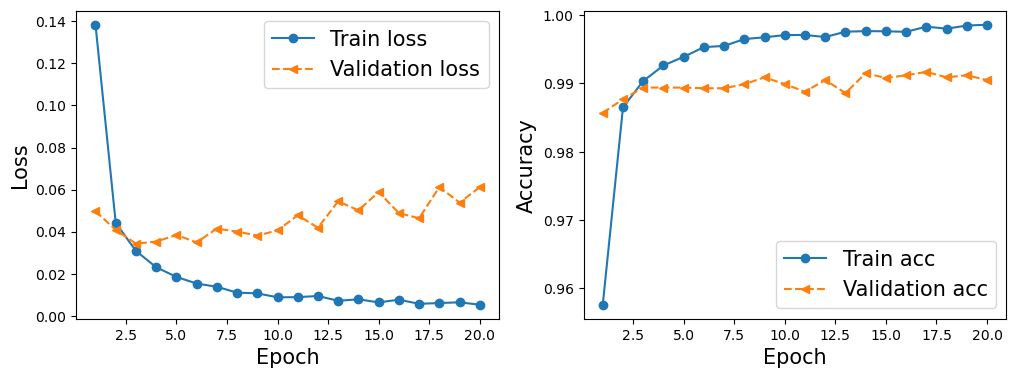

In [18]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.legend(fontsize=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [19]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9915

Test Acc. 99.15%


TensorShape([12, 10])
tf.Tensor([7 2 1 0 4 1 4 9 5 9 0 6], shape=(12,), dtype=int64)


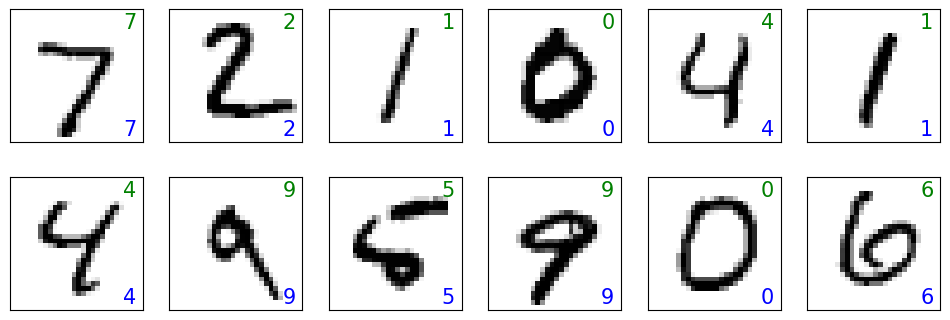

In [23]:
batch_test = next(iter(mnist_test.batch(12)))

y_true = batch_test[1]

preds = model(batch_test[0])
tf.print(preds.shape)

preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4),)
for i in range(12):
    ax = fig.add_subplot(2, 6, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    # 显示预测值
    ax.text(0.9, 0.1, '{}'.format(preds[i]),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    # 显示真实值
    ax.text(0.9, 0.9, '{}'.format(y_true[i]),
            size=15, color='green',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
plt.show()

### 查看前20个不正确的值

In [36]:
y_pred = []
for X, _ in iter(mnist_test.batch(20)):
    preds_ = model(X)
    preds_ = tf.argmax(preds_, axis=1)
    y_pred.extend(map(lambda x: x.numpy(), preds_))

results = pd.DataFrame({'y_pred': y_pred, 'y_true': y_test})
results

,y_pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [34]:
diffs = results[results.y_pred != results.y_true]
diffs

,y_pred,y_true
115,9,4
247,6,4
259,0,6
340,3,5
445,0,6
...,...,...
9642,7,9
9664,7,2
9692,7,9
9729,6,5


In [45]:
diffs.shape

(85, 2)

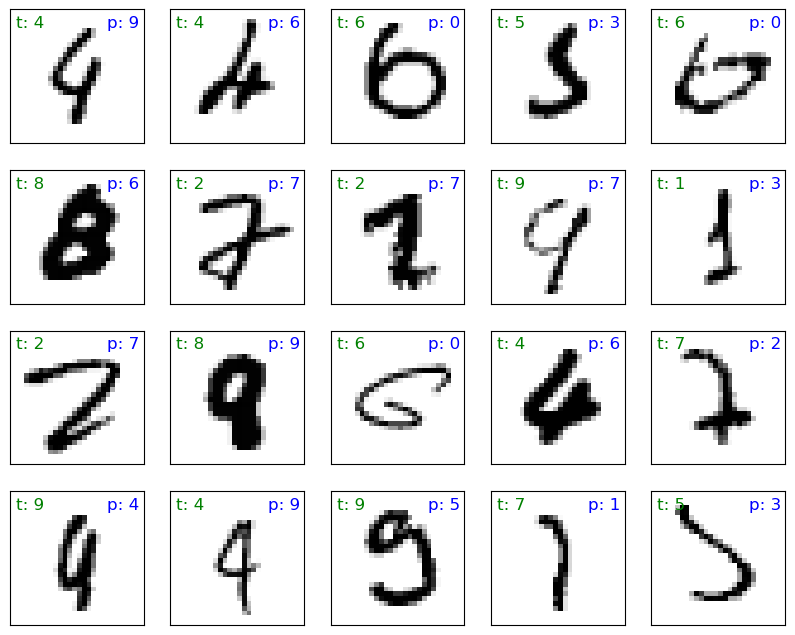

In [44]:
idxes = diffs.index

fig = plt.figure(figsize=(10, 8),)
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    img = X_test[idxes[i], :, :, 0]
    ax.imshow(img, cmap='gray_r')
    
    # 显示真实值
    ax.text(0.15, 0.9, 't: {}'.format(diffs.loc[idxes[i], 'y_true']),
            size=12, color='green',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

    # 显示预测值
    ax.text(0.85, 0.9, 'p: {}'.format(diffs.loc[idxes[i], 'y_pred']),
            size=12, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()